# Boston Housing Price Prediction 

In this notebook, we're going to take a look at the popular Boston Housing Prices dataset that's used readily on a website known as Kaggle.com for Data Science competitions. 

We're going to first learn about this dataset and then we'll try to predict the median house prices in Boston using linear regression. If time permits, I'll show you how to use seaborn and scikit-learn for multiple linear regression. 

In [9]:
# Let's import the Boston dataset 

%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# Loading the dataset in Pandas 

boston_df = pd.read_csv("../data/housing.csv")
boston_df.head()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


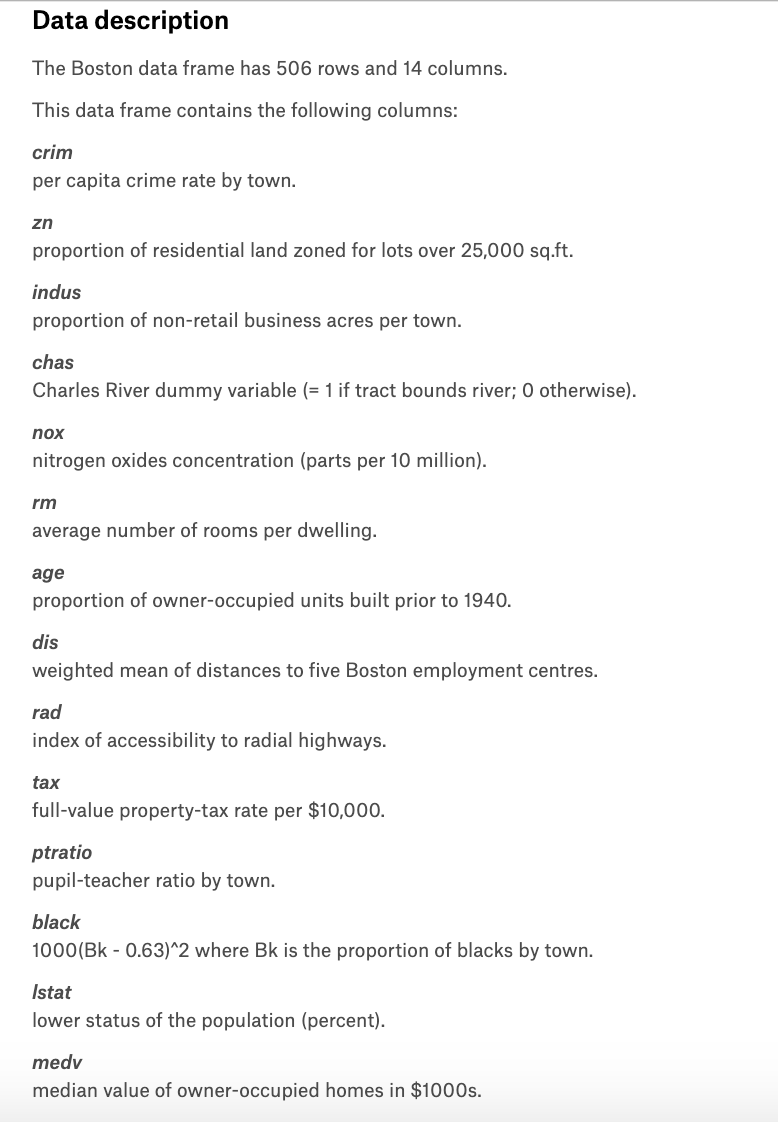

In [16]:
from IPython.display import display, Image 

display(Image("../images/boston_dataset_description.png", width="1200", height="500"))  

## Doing the Regression 

For demo purposes, I'll predict the median household value (medv) from the weighted mean of distances to five Boston employment centers (dis) . 

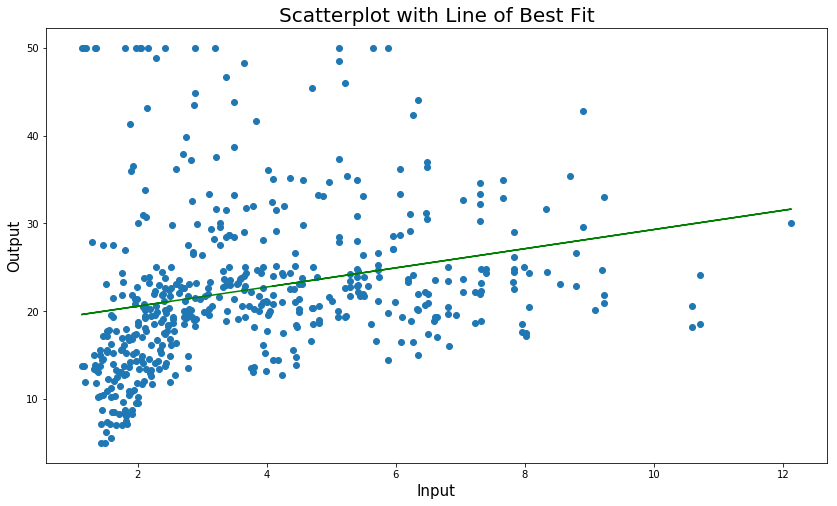

In [19]:
def prediction(input):
    Y = np.array(boston_df['MEDV']) 
    X = np.array(boston_df[input]) 

    denominator = X.dot(X) - X.mean() * X.sum() 
    beta_1 = (X.dot(Y) - Y.mean()*X.sum()) / denominator 
    beta_0 = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator 

    # our regression model 

    y_hat = beta_1 * X + beta_0  
    return y_hat 



# Plotting the line of best fit 

plt.figure(figsize=(14,8))
plt.title("Scatterplot with Line of Best Fit", size="20")
plt.xlabel("Input", size="15")
plt.ylabel("Output", size="15")
plt.scatter(X,Y)
plt.plot(X, prediction('DIS'), 'g')  

In [18]:
# Getting our r-square value 

difference_one = Y - y_hat 
difference_two = Y - Y.mean() 

r_square = 1 - difference_one.dot(difference_one) / difference_two.dot(difference_two) 



from IPython.display import Markdown, display

display(Markdown(f"Our $ r^2 $ value is: {round(r_square*100,3)}%"))

Our $ r^2 $ value is: 6.246%